In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_excel('final_feat.xlsx')

In [47]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,...,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,Thursday,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,...,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,Friday,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,...,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,Saturday,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,...,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,Sunday,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,...,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,Monday,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,...,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


In [75]:
df1=df[['Completed Jobs', 'Total Leads','Income_y','Lead Calls','TMAX',
        'Avg Install']]

<AxesSubplot:>

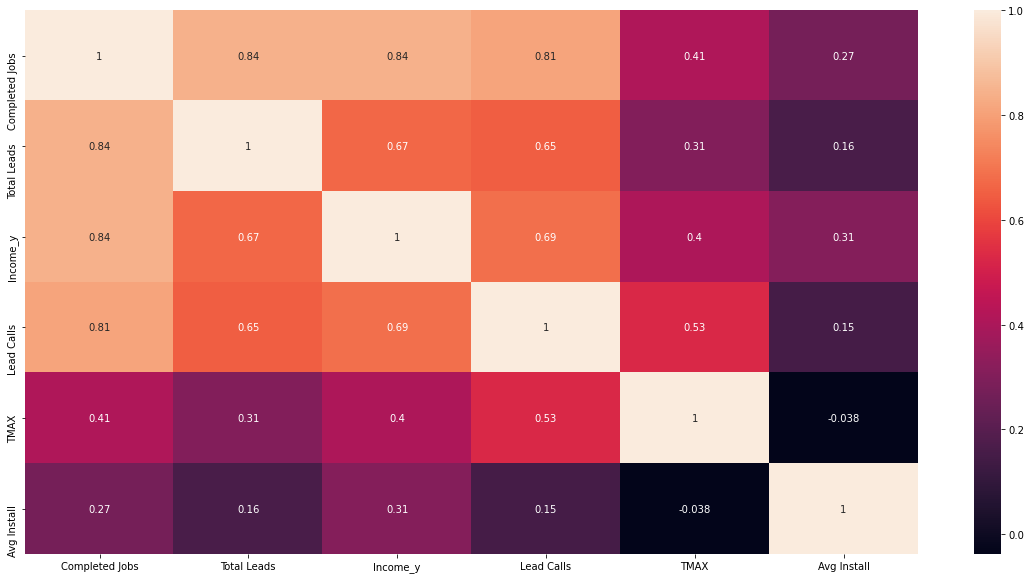

In [76]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [77]:
train=df1[0:300]
test=df1[300:]

In [78]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestRegressor


In [81]:
# intializing the randomeforest regressor

random_forest_reg=RandomForestRegressor()

In [82]:
X_train.isnull().sum()

Completed Jobs    0
Total Leads       0
Lead Calls        0
TMAX              0
Avg Install       0
dtype: int64

In [83]:
X_train['Avg Install'].median()

1676.6812871285001

In [84]:
X_train['Avg Install']=X_train['Avg Install'].fillna(1706.382716049)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
# fit the X_train and y_train values to the model
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [86]:
# training data set score
random_forest_reg.score(X_train,y_train)

0.955336394225611

In [87]:
# test data set score
random_forest_reg.score(X_test,y_test)

0.5933462021388518

In [88]:
X.isnull().sum(0)

Completed Jobs    0
Total Leads       0
Lead Calls        0
TMAX              0
Avg Install       0
dtype: int64

In [89]:
X['Avg Install'].median()

1647.7444714585

In [90]:
X['Avg Install']=X['Avg Install'].fillna(1712.5)

In [91]:
test.isnull().sum()

Completed Jobs    0
Total Leads       0
Income_y          0
Lead Calls        0
TMAX              0
Avg Install       1
dtype: int64

In [92]:
test['Avg Install'].median()

2298.813953488

In [93]:
test['Avg Install']=test['Avg Install'].fillna(2298.813953488)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [95]:
random_forest_reg.score(X_,y_)

-0.12315424208218961

In [96]:
y_pred=random_forest_reg.predict(X_)

In [97]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

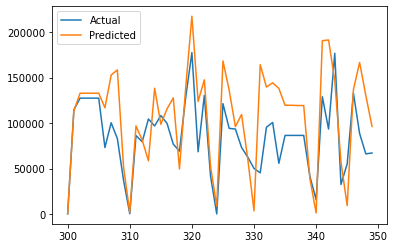

In [98]:
comp.plot()


In [99]:
from sklearn import metrics

In [100]:
np.sqrt(metrics.mean_squared_error(y_,y_pred))

41983.14200730193

In [101]:
metrics.mean_absolute_error(y_,y_pred)

31987.06598000001